In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

C:\Users\haochen shi\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
ALL_HH = pd.read_csv('all_HH_combined_mean.csv')
ALL_HH.head()

,date,bath_temp_mean,backroom_hum_mean,mediumbed_temp_mean,box_temp_mean,backroom_temp_mean,kit_hum_mean,bed_temp_mean,toilet_hum_mean,mediumbed_hum_mean,...,util_hum_mean,smallbed_hum_mean,dining_temp_mean,bath_hum_mean,box_hum_mean,rearbed_hum_mean,frontbed_hum_mean,leftbed_temp_mean,backbed_temp_mean,Gas m3_mean_zscore
0,08/03/2020 00:00,19.214130,NaN,20.880,22.503333,NaN,57.991200,20.074706,42.8,59.50,...,46.5,62.15,22.30,53.743913,49.166667,53.1,51.466667,20.006667,21.472,-0.019898
1,08/03/2020 00:30,18.975417,52.2,20.805,22.290000,21.07,57.956923,20.157778,43.5,59.85,...,47.4,61.60,20.52,55.335417,49.200000,52.7,51.166000,19.856667,21.258,-0.086565
2,08/03/2020 01:00,18.696600,53.0,20.755,21.825000,20.46,58.089615,19.740588,44.2,60.00,...,47.3,61.30,20.08,55.742800,50.750000,53.0,51.676667,19.723333,21.038,-0.115979
3,08/03/2020 01:30,18.514000,53.3,20.715,21.623333,20.20,58.235769,20.026111,43.5,60.05,...,46.8,61.40,19.68,55.981600,50.133333,53.3,51.573333,19.603333,20.780,-0.085228
4,08/03/2020 02:00,18.628000,60.8,20.710,21.473333,19.99,58.053600,19.987222,43.4,60.00,...,47.1,61.25,21.17,57.528000,50.866667,53.7,50.058000,19.483333,20.712,-0.073195


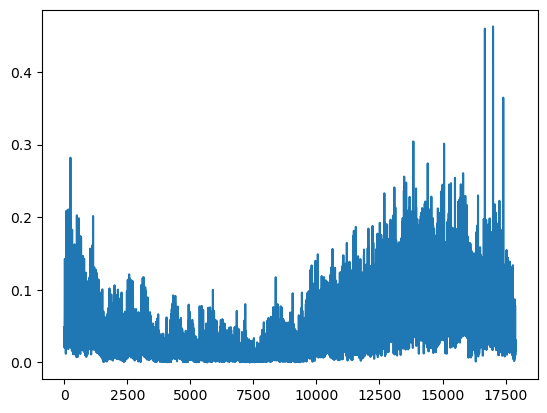

In [4]:
plt.plot( ALL_HH['Gas m3_mean'])


In [5]:
ALL_HH.dtypes

date                            object
bath_temp_mean                 float64
backroom_hum_mean              float64
mediumbed_temp_mean            float64
box_temp_mean                  float64
backroom_temp_mean             float64
kit_hum_mean                   float64
bed_temp_mean                  float64
toilet_hum_mean                float64
mediumbed_hum_mean             float64
hall_temp_mean                 float64
util_temp_mean                 float64
kit_temp_mean                  float64
rearbed_temp_mean              float64
rightbed_hum_mean              float64
liv_temp_mean                  float64
rightbed_temp_mean             float64
hall_hum_mean                  float64
toilet_temp_mean               float64
Gas m3_mean                    float64
backbed_hum_mean               float64
masterbed_hum_mean             float64
Air temp (degC)_mean           float64
RH (%)_mean                    float64
liv_hum_mean                   float64
frontbedabovedoor_hum_mea

In [6]:

# Filter columns based on the specified substrings
sh_temp_columns_to_average = [col for col in ALL_HH.columns if 
                      ('bed' in col and 'temp' in col) or
                      ('liv' in col and 'temp' in col) or
                      ('hall' in col and 'temp' in col) or 
                      ('box' in col and 'temp' in col) or 
                      ('din' in col and 'temp' in col) or
                     ('back' in col and 'temp' in col)]

# Calculate the mean for the filtered columns
ALL_HH['sh_temp_mean'] = ALL_HH[sh_temp_columns_to_average].mean(axis=1,skipna= True)


# Filter columns based on the specified substrings
sh_hum_columns_to_average = [col for col in ALL_HH.columns if 
                      ('bed' in col and 'hum' in col) or
                      ('liv' in col and 'hum' in col) or
                      ('hall' in col and 'hum' in col) or 
                      ('box' in col and 'hum' in col) or 
                      ('din' in col and 'hum' in col) or
                     ('back' in col and 'hum' in col)]

# Calculate the mean for the filtered columns
ALL_HH['sh_hum_mean'] = ALL_HH[sh_hum_columns_to_average].mean(axis=1,skipna= True)


# Filter columns based on the specified substrings
dwh_temp_columns_to_average = [col for col in ALL_HH.columns if 
                      ('bath' in col and 'temp' in col) or
                      ('toil' in col and 'temp' in col) ]

# Calculate the mean for the filtered columns
ALL_HH['dwh_temp_mean'] = ALL_HH[dwh_temp_columns_to_average].mean(axis=1,skipna= True)


# Filter columns based on the specified substrings
dwh_hum_columns_to_average = [col for col in ALL_HH.columns if 
                      ('bath' in col and 'hum' in col) or
                      ('toil' in col and 'hum' in col) ]

# Calculate the mean for the filtered columns
ALL_HH['dwh_hum_mean'] = ALL_HH[dwh_hum_columns_to_average].mean(axis=1, skipna= True)








# Create a new DataFrame with the mean values and the date column
mean_df = ALL_HH[['date', 'Gas m3_mean','Air temp (degC)_mean','RH (%)_mean', 'sh_temp_mean','sh_hum_mean','dwh_temp_mean','dwh_hum_mean']]

mean_df.head()

,date,Gas m3_mean,Air temp (degC)_mean,RH (%)_mean,sh_temp_mean,sh_hum_mean,dwh_temp_mean,dwh_hum_mean
0,08/03/2020 00:00,0.048621,10.100000,82.666667,21.035661,53.204083,21.527065,48.271957
1,08/03/2020 00:30,0.032000,10.100000,83.000000,20.779522,53.957879,21.357708,49.417708
2,08/03/2020 01:00,0.024667,10.033333,85.000000,20.570958,54.429973,21.183300,49.971400
3,08/03/2020 01:30,0.032333,10.166667,84.333333,20.417293,54.679370,21.037000,49.740800
4,08/03/2020 02:00,0.035333,10.200000,84.000000,20.443435,55.010402,21.039000,50.464000


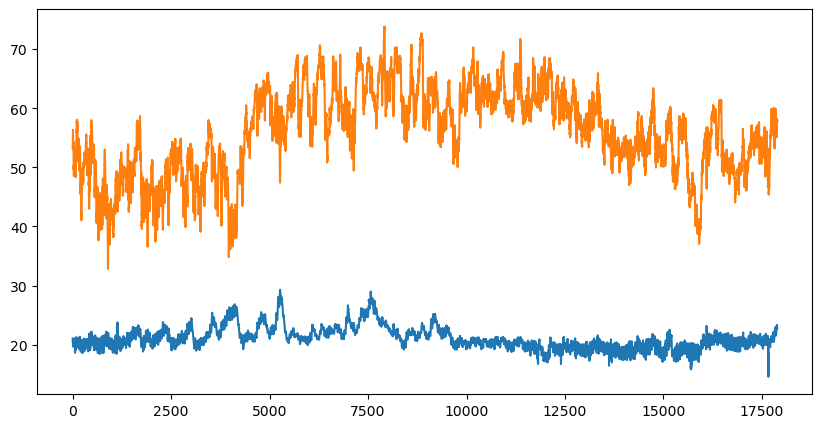

In [7]:
plt.figure(figsize=(10, 5))
plt.plot( mean_df['sh_temp_mean'])
plt.plot( mean_df['sh_hum_mean'])

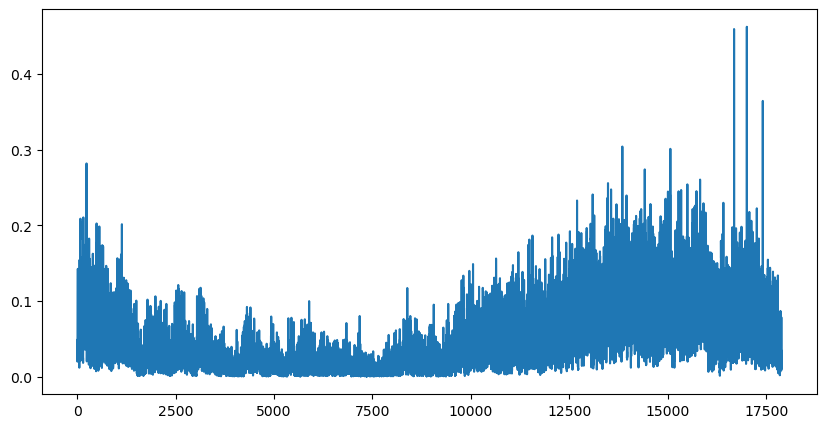

In [8]:
plt.figure(figsize=(10, 5))
plt.plot( mean_df['Gas m3_mean'])


In [9]:
mean_df.to_csv('SH_DWH_COM.csv')


In [19]:
print('FIELDS     ','            MISSING VALUES')
mean_df.isna().sum()

FIELDS                  MISSING VALUES


date                       0
Gas m3_mean                0
Air temp (degC)_mean    1230
RH (%)_mean             1230
sh_temp_mean              20
sh_hum_mean               57
dwh_temp_mean             20
dwh_hum_mean              58
dtype: int64